## **Author:** Faiber Alonso Leal

# **Building a Regression Model in Keras**
##

<a id="item31"></a>


##  A. Build a baseline model

Let's start by importing the <em>pandas</em> and the Numpy libraries.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented. 
# If you run this notebook on a different environment, e.g. your desktop, you may need to uncomment and install certain libraries.

!pip install numpy==1.21.4
!pip install pandas==1.3.4
!pip install keras==2.1.6

In [2]:
import pandas as pd
import numpy as np

Let's download the data and read it into a <em>pandas</em> dataframe.


In [3]:
concrete_data = pd.read_csv('https://cocl.us/concrete_data')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### Let's check how many data points we have.


In [4]:
concrete_data.shape

(1030, 9)

So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.

Let's check the dataset for any missing values.


In [5]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

The data looks very clean and is ready to be used to build our model.


### Split data into predictors and target


The target variable in this problem is the concrete sample strength. Therefore, our predictors will be all the other columns.


In [7]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

Now, we randomly split the data into a training and test sets by holding 30% of the data for testing using the train_test_split helper function from Scikit-learn.

In [8]:
from sklearn.model_selection import train_test_split

# Supongamos que X son las características y y son las etiquetas
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=69)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


<a id="item2"></a>


Let's do a quick sanity check of the predictors and the target dataframes.


In [9]:
print(X_test.shape)
print(X_train.shape)
X_test.head()

(309, 8)
(721, 8)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
42,237.5,237.5,0.0,228.0,0.0,932.0,594.0,365
184,222.4,0.0,96.7,189.3,4.5,967.1,870.3,3
131,379.5,151.2,0.0,153.9,15.9,1134.3,605.0,28
550,393.0,0.0,0.0,192.0,0.0,940.6,785.6,7
808,252.0,0.0,0.0,186.0,0.0,1111.0,784.0,7


In [10]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

Now, we will create our neural network using keras

In [11]:
import keras

from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

Let's find the number of predictors in our train set

In [12]:
n_cols = X_train.shape[1] # number of predictors
n_cols

8

Now we define our model with one hidden layer of 10 nodes, and a ReLU activation function. Additionally, we use the adam optimizer and the mean squared error  as the loss function.

In [13]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [24]:
#build the model
model = regression_model()

In [28]:
# fit the model model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)
model.fit(X_train, y_train, epochs=50, verbose=0)

In [33]:
scores = model.evaluate(X_test, y_test, verbose = 0)
print('Mean_Squared_error_on_test_set = {:.2f}'.format(round(scores, 2)))

Mean_Squared_error_on_test_set = 110.53


### Now let's repeat this process 50 times and then report the mean and the standard deviation of the mean squared errors:

In [34]:
scores_list = []
for k in range(0,50):
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=k)
    model = regression_model()
    model.fit(X_train, y_train, epochs=50, verbose=0)
    scores = model.evaluate(X_test, y_test, verbose = 0)
    scores_list.append(scores)
print(scores_list)

[96.13310366386735, 2722.194781553398, 99.77738221795042, 126.84073317938253, 1210.6167094900384, 244.31536341793714, 246.58881276942378, 301.96169876049254, 127.73976940167374, 111.71328399559441, 244.82521417611625, 133.37725832547184, 81.2221811782195, 129.37475166197348, 275.966777813859, 258.96981426350123, 454.38024862838796, 669.2170378552286, 342.99664286888145, 215.42143827271693, 128.7384595654929, 629.4723611479824, 957.3711984381321, 1097.8150091572486, 96.36975776647672, 104.7165359447689, 104.14375924909771, 107.44872834535865, 550.0878839091575, 146.87041732639943, 812.5807230433986, 572.7815073747851, 4208.444482895934, 228.70062685475767, 188.40076715660712, 1075.77531082499, 307.64279688369106, 140.81918201631711, 149.21716832034411, 181.99370009536497, 520.6714985177741, 116.05548068543469, 112.50799242038171, 196.38263359193277, 99.87164793045389, 135.89837535376688, 124.19477671404101, 104.76788858456905, 184.22063171979292, 214.49765296121245]


Now, we calculate the mean and the standard deviation

In [35]:
# Calculate the mean of the scores list
mean_score = np.mean(scores_list)

# Calculate the standard deviation of the scores list
std_deviation = np.std(scores_list)

print("Mean of the scores:", mean_score)
print("Standard deviation of the scores:", std_deviation)

Mean of the scores: 433.8418391657956
Standard deviation of the scores: 696.9891877193618


In [37]:
import matplotlib.pyplot as plt

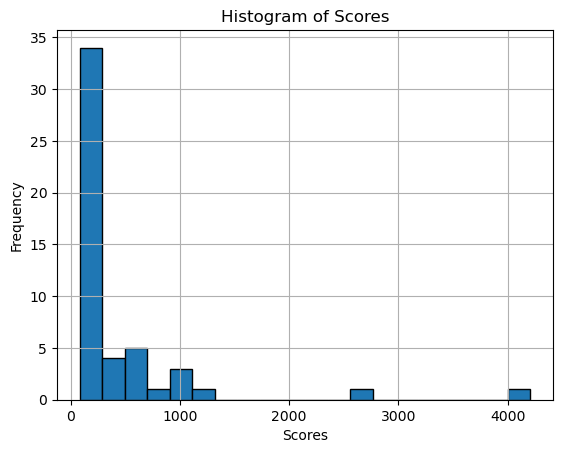

In [38]:
# Plot histogram of scores
plt.hist(scores_list, bins=20, edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Scores')
plt.grid(True)
plt.show()

##  B. Normalize the data and repeat part A

Let's normalize the data by substracting the mean and dividing by the standard deviation.


In [40]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [41]:
norm_scores_list = []
for k in range(0,50):
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3, random_state=k)
    model = regression_model()
    model.fit(X_train, y_train, epochs=50, verbose=0)
    scores = model.evaluate(X_test, y_test, verbose = 0)
    norm_scores_list.append(scores)
print(norm_scores_list)

[283.01624621542527, 327.4244639572588, 329.7523315824737, 386.029413217094, 294.6299636988964, 335.2118645825432, 438.0121841183758, 199.89051295406995, 554.6577835823725, 394.1691766140145, 610.1280037592916, 283.98195077840563, 398.4723852460053, 304.93969321636706, 270.838397967391, 324.69055896746687, 226.4243085052589, 307.36608600307824, 415.9602935692253, 480.39949010953933, 278.17817060847113, 269.5580994442443, 332.7923246217006, 308.163732238572, 222.93091324000682, 413.1568830669119, 286.5208342221948, 538.5947967825584, 506.4905698708346, 326.32869367383444, 317.9739615924922, 275.72738311668815, 393.20105563166845, 240.3771138114065, 325.15869101120046, 428.33716244990774, 244.48945499160914, 331.8175904110412, 311.67037366354737, 338.5993593086317, 391.80821707024927, 333.13377079145806, 313.98560735708685, 487.89803119153265, 308.55195662118854, 304.0772670511289, 275.63677771114607, 543.301344985715, 291.50733330488976, 263.72695779646097]


In [42]:
# Calculate the mean of the scores list
mean_score = np.mean(norm_scores_list)

# Calculate the standard deviation of the scores list
std_deviation = np.std(norm_scores_list)

print("Mean of the scores after normalization:", mean_score)
print("Standard deviation of the scores after normalization:", std_deviation)

Mean of the scores after normalization: 347.3937907256587
Standard deviation of the scores after normalization: 92.1033538617148


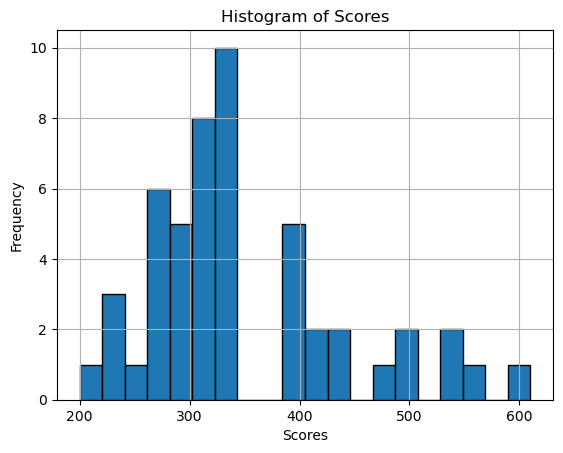

In [43]:
# Plot histogram of norm_scores
plt.hist(norm_scores_list, bins=20, edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Scores')
plt.grid(True)
plt.show()

**Conclusion:** after normalizing the predictors, we observe a decrease in both the mean and the standard deviation of the scores. The mean decreases from 433.84 to 347.39, indicating that the average value of the scores is shifted downwards. Additionally, the standard deviation decreases from 696.99 to 92.10, implying a reduction in the variability of the scores around the mean. This suggests that normalizing the predictors has effectively rescaled the data, making it more consistent and easier for the model to learn from.

<a id="item1"></a>


## C. Repeat Part B but use 100 epochs this time for training.

We will use the same neural network with the normalized predictors, but we will set epochs=100

In [44]:
norm_scores_list = []
for k in range(0,50):
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3, random_state=k)
    model = regression_model()
    model.fit(X_train, y_train, epochs=100, verbose=0)
    scores = model.evaluate(X_test, y_test, verbose = 0)
    norm_scores_list.append(scores)
print(norm_scores_list)

[147.65534316374647, 175.55303095845343, 155.2223797153115, 159.969585949549, 187.5807184015663, 156.15891757212026, 187.8502997240974, 138.92717700945906, 167.39568301697764, 141.4051372441659, 148.9223773055092, 140.6414593446602, 173.72821746134835, 185.72174674716197, 182.44907114961, 167.99339807998015, 129.2287783082635, 160.86308095987562, 130.39811444822638, 164.03825571004626, 145.7620085188486, 159.76624562285093, 165.1014554909518, 150.2803707925247, 142.5016447394411, 152.9886975828498, 161.8762549736739, 174.02753925014855, 155.46493717921976, 180.90263016092737, 200.64751668886845, 158.35744709644501, 167.7925929097296, 146.4637407716424, 138.6539043438859, 171.7985779104881, 163.35788758904417, 169.9123719348105, 149.23014189587443, 159.280025741429, 171.25080940715702, 163.53774318262984, 138.89588454163191, 162.30145871060566, 162.2938679815496, 173.12460944413368, 170.24436471686008, 176.10131352001795, 194.66422555670383, 153.95557598620172]


In [45]:
# Calculate the mean of the scores list
mean_score = np.mean(norm_scores_list)

# Calculate the standard deviation of the scores list
std_deviation = np.std(norm_scores_list)

print("Mean of the scores after normalization with 100 epochs:", mean_score)
print("Standard deviation of the scores after normalization with 100 epochs:", std_deviation)

Mean of the scores after normalization with 100 epochs: 161.64477233022546
Standard deviation of the scores after normalization with 100 epochs: 16.036749402845142


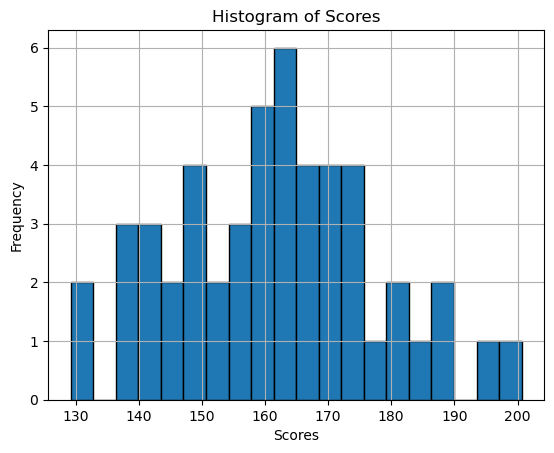

In [46]:
# Plot histogram of norm_scores
plt.hist(norm_scores_list, bins=20, edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Scores')
plt.grid(True)
plt.show()

**Conclusion:** The results indicate that increasing the number of epochs from 50 to 100 leads to a significant improvement in the performance of the model. After normalization, the mean of the scores decreases from 347.39 to 161.64, suggesting that the average error of the model's predictions is substantially reduced. Similarly, the standard deviation of the scores decreases from 92.10 to 16.04, indicating a significant reduction in the variability of the errors around the mean.

This improvement in performance suggests that allowing the model to train for more epochs enables it to better capture the underlying patterns in the data and make more accurate predictions. However, it's worth noting that this improvement comes at the cost of increased computation time, as the time required for training doubled when the number of epochs was doubled from 50 to 100. Therefore, there is a trade-off between model performance and computational resources, and it's important to consider this balance when deciding on the number of epochs to use for training.

<a id='item33'></a>


## D. Increase the number of hidden layers
Repeat part B but use a neural network with the following instead:

- Three hidden layers, each of 10 nodes and ReLU activation function.

First, we define our neural network

In [48]:
def regression_model_2():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

Now, we use the regression_model2 with 50 epochs, and we repeat the process 50 times

In [49]:
norm_scores_list = []
for k in range(0,50):
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3, random_state=k)
    model = regression_model_2()
    model.fit(X_train, y_train, epochs=50, verbose=0)
    scores = model.evaluate(X_test, y_test, verbose = 0)
    norm_scores_list.append(scores)
print(norm_scores_list)

[119.12905696140524, 149.59876663553675, 127.88794488505638, 117.05499628060844, 113.90875584870867, 134.99677037112536, 149.9269579050996, 110.85474743889374, 121.89478788406717, 133.6836271810686, 129.04707291982706, 124.90487058571627, 146.28380653850468, 125.22704149758546, 145.91646731478497, 108.13192137931158, 117.27508979476386, 128.7936799873426, 90.68401415679833, 142.95215525210483, 111.37267108411079, 135.9581561042267, 105.60233679712783, 133.662578471656, 130.69482046577923, 111.61808223786092, 123.17068106148236, 131.98698346283058, 136.4339345790036, 136.8164370885559, 166.28221821707814, 84.53122804388644, 137.82317270815952, 126.99774577316728, 134.05224476045774, 127.6538174329838, 147.52690564004348, 139.2677572552826, 136.67216012701633, 136.24766891133825, 123.11310861334445, 139.88413300251884, 130.74024704127635, 98.2169672648112, 120.64477104507989, 131.61749951507667, 125.4055975756599, 144.86480979549074, 92.07164236025517, 143.93413790607144]


Now we calculate the mean and the standard deviation

In [50]:
# Calculate the mean of the scores list
mean_score = np.mean(norm_scores_list)

# Calculate the standard deviation of the scores list
std_deviation = np.std(norm_scores_list)

print("Mean of the scores:", mean_score)
print("Standard deviation of the scores:", std_deviation)

Mean of the scores: 127.66034090319884
Standard deviation of the scores: 16.11952724376452


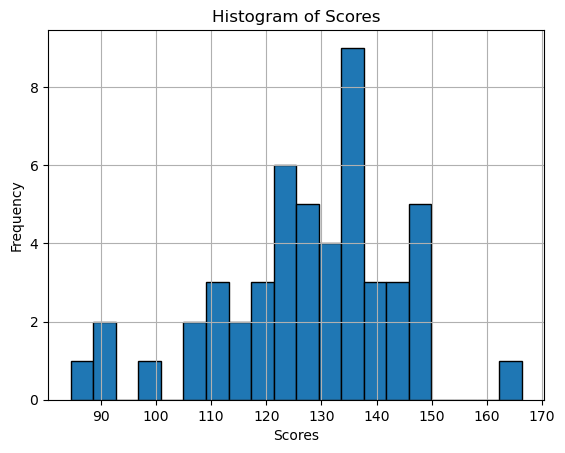

In [51]:
# Plot histogram of norm_scores
plt.hist(norm_scores_list, bins=20, edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Scores')
plt.grid(True)
plt.show()

**Conclusion:** The results indicate a significant improvement in the model's performance when adding two extra hidden layers to the neural network, even with a fixed number of epochs (50) and normalized data.

After normalization and training for 50 epochs, the mean of the scores decreases substantially from 347.39 to 127.66, suggesting a considerable reduction in the average error of the model's predictions. Similarly, the standard deviation of the scores decreases significantly from 92.10 to 16.12, indicating a substantial decrease in the variability of the errors around the mean.

These results demonstrate that incorporating two extra hidden layers enhances the model's ability to capture complex patterns in the data and make more accurate predictions. The reduction in both the mean and standard deviation of the scores highlights the improved precision and consistency of the model's predictions when additional hidden layers are introduced.

Overall, the findings suggest that increasing the depth of the neural network by adding extra hidden layers can lead to substantial improvements in predictive performance, even with a relatively small number of epochs and normalized data.

<a id="item4"></a>


## **Author:** Faiber Alonso Leal

<a id='item34'></a>
